In [1]:
import pandas as pd
train = pd.read_csv("train.csv")

In [2]:
train.shape

(891, 12)

In [3]:
test = pd.read_csv("test.csv")

In [4]:
test.shape

(418, 11)

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

        Survived
Sex             
female  0.742038
male    0.188908


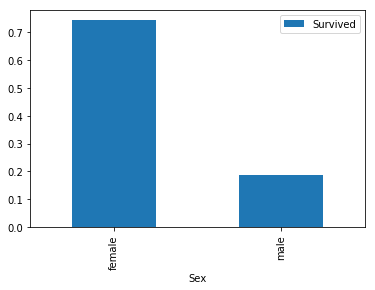

In [7]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
print(sex_pivot)
sex_pivot.plot.bar()
plt.show()

## Here the variable "Sex" is explored because it was assumed that female were given more preference than men and indeed female survivors are more than male survivors

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


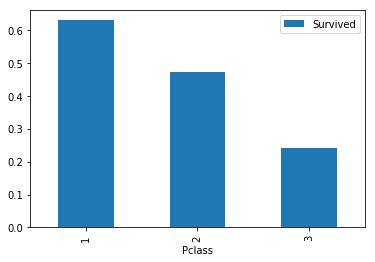

In [13]:
class_pivot = train.pivot_table(index="Pclass",values="Survived")
print(class_pivot)
class_pivot.plot.bar()
plt.show()

## Here i explored the "class" variable because the higher class people were given more preference than the middle and the lower class

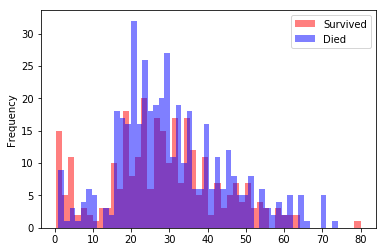

In [14]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha = 0.5,color='red',bins=50)
died["Age"].plot.hist(alpha = 0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

## The "age" column is explored here because younger people were given preference over old people.Also we can see that the survival rate is a little higher for young people than the older ones.

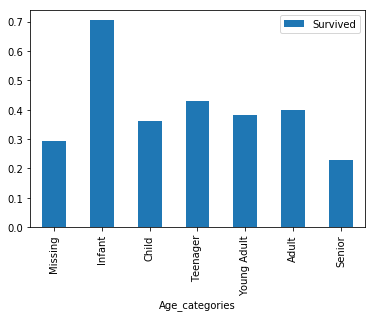

In [15]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [21]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [23]:
features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']


In [24]:
target = "Survived"

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train[features], train[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
train_X, test_X, train_y, test_y = train_test_split(train[features], train[target], test_size=0.2,random_state=0)
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np
lr = LogisticRegression()
scores = cross_val_score(lr, train[features], train[target], cv=10)

In [34]:
accuracy = np.mean(scores)
accuracy

0.8024670865963002

In [36]:
lr = LogisticRegression()
lr.fit(train[features],train[target])
holdout_predictions = lr.predict(test[features])

In [37]:
test["survived"] = holdout_predictions

In [39]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'survived'],
      dtype='object')

In [ ]:
holdout_ids = test["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)


In [45]:
submission = test.loc[:,["PassengerId","survived"]]
submission.to_csv("submission.csv",index=False)

In [19]:
import pandas as pd

train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
train = process_age(train)
holdout = process_age(holdout)

for column in ["Age_categories","Pclass","Sex"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)

print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')


In [17]:
columns = ['SibSp','Parch','Fare','Cabin','Embarked']
test[columns].describe(include='all')

,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,417.000000,91,418
unique,NaN,NaN,NaN,76,3
top,NaN,NaN,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,3,270
mean,0.447368,0.392344,35.627188,NaN,NaN
std,0.896760,0.981429,55.907576,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,7.895800,NaN,NaN
50%,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,0.000000,31.500000,NaN,NaN


In [20]:
from sklearn.preprocessing import minmax_scale
columns = ["SibSp","Parch","Fare"]
test["Fare"] = test["Fare"].fillna(train["Fare"].mean())
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

train = create_dummies(train,"Embarked")
test = create_dummies(test,"Embarked")

for col in columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    test[col + "_scaled"] = minmax_scale(test[col])

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [28]:
features = [
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Embarked_C',
       'Embarked_Q', 'Embarked_S']

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train[features],train['Survived'])
coefficients = lr.coef_
coefficients

array([[-0.35403286,  1.85753477,  0.34221615, -0.18714181, -0.01498915,
        -0.53028095, -0.90380151,  1.03559123,  0.12891362, -0.95500022,
         1.44187754, -1.23237292,  0.15544086,  0.15478886, -0.10072509,
        -1.7479771 , -0.77683938,  0.54035726,  0.15544086,  0.15478886,
        -0.10072509]])

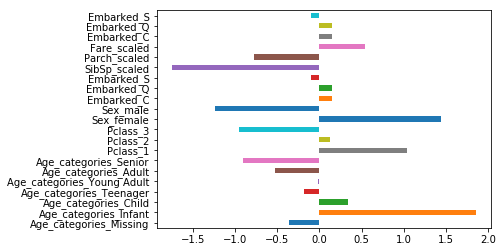

In [29]:
feature_importance = pd.Series(coefficients[0],
                               index=train[features].columns)
feature_importance.plot.barh()
plt.show()

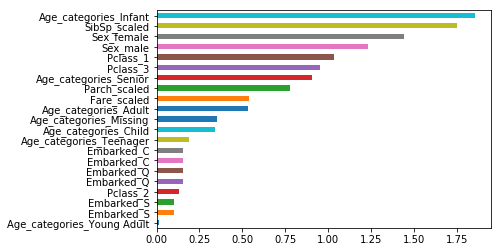

In [30]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

In [36]:
selected_features = ["Age_categories_Infant","SibSp_scaled","Sex_female","Sex_male","Pclass_1","Pclass_3","Age_categories_Senior","Parch_scaled"]

In [37]:
lr = LogisticRegression()
scores = cross_val_score(lr,train[selected_features],train["Survived"],cv=10)

In [38]:
scores

array([0.82222222, 0.82222222, 0.79775281, 0.86516854, 0.83146067,
       0.78651685, 0.79775281, 0.76404494, 0.84269663, 0.81818182])

In [39]:
scores.mean()

0.8148019521053229

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled'],
      dtype='object')

In [46]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'SibSp_scaled', 'Parch_scaled',
       'Fare_scaled'],
      dtype='object')

## Perform a test

In [50]:
test["Fare"].describe()

count    418.000000
mean      35.619000
std       55.840751
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [52]:
cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]
train["Fare_categories"] = pd.cut(train["Age"],cut_points,labels=label_names)   

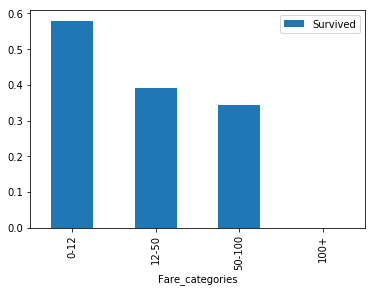

In [53]:
pivot = train.pivot_table(index="Fare_categories",values='Survived')
pivot.plot.bar()
plt.show()

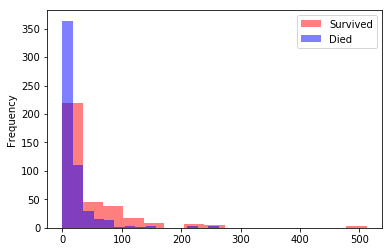

In [60]:
survived["Fare"].plot.hist(alpha = 0.5,color='red',bins=15)
died["Fare"].plot.hist(alpha = 0.5,color='blue',bins=15)
plt.legend(['Survived','Died'])
plt.show()

In [65]:
train["cabin_type"] = train["Cabin"].str[0]

In [68]:
train["cabin_type"]=train["cabin_type"].fillna("Unknown")

In [78]:
extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.')

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [81]:
train["Title"] = extracted_titles.map({
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
})

In [86]:
import seaborn as sns

In [87]:
train = create_dummies(train,"Title")

In [88]:
train = create_dummies(train,"cabin_type")

In [91]:
train = create_dummies(train,"Fare_categories")

In [92]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories',
       'cabin_type', 'Title', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'cabin_type_A',
       'cabin_type_B', 'cabin_type_C', 'cabin_type_D', 'cabin_type_E',
       'cabin_type_F', 'cabin_type_G', 'cabin_type_T', 'cabin_type_Unknown',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+'],
      dtype='object')

In [98]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child','Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'cabin_type_A','cabin_type_B', 'cabin_type_C', 'cabin_type_D',
       'cabin_type_E','cabin_type_F', 'cabin_type_G', 'cabin_type_T', 'cabin_type_Unknown']

In [104]:
correlations = train[columns].corr()
import numpy as np

In [105]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

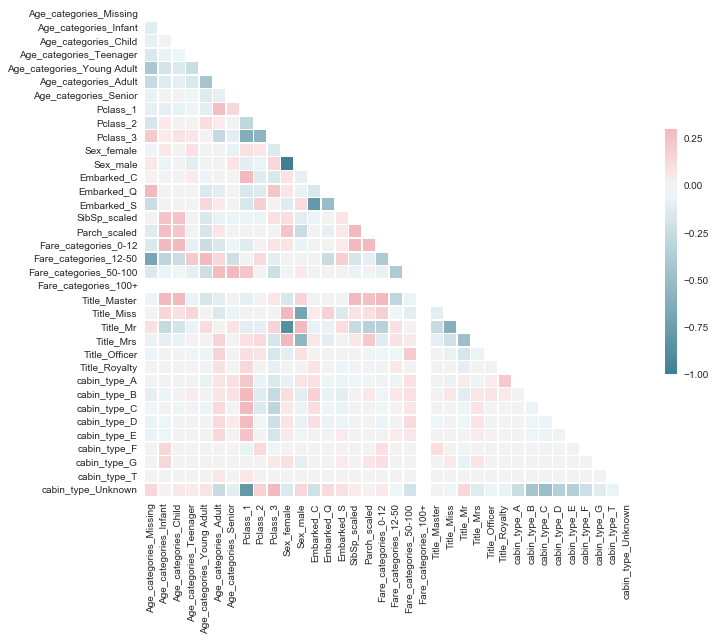

In [106]:
plot_correlation_heatmap(train[columns])

In [114]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'cabin_type_B', 'cabin_type_C',
       'cabin_type_D', 'cabin_type_E', 'cabin_type_F', 'cabin_type_G',
       'cabin_type_T', 'cabin_type_Unknown']

In [115]:
from sklearn.feature_selection import RFECV
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(train[columns],train["Survived"])

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [117]:
optimized_columns = train[columns].columns[selector.support_]

In [118]:
all_X = train[optimized_columns]
all_y = train["Survived"]
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()

In [119]:
accuracy

0.8260634434229941

## Use it on test model

## See slide 12

In [1]:
import pandas as pd
train = pd.read_csv("train_modified.csv")
holdout = pd.read_csv("holdout_modified.csv")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

In [5]:
lr = LogisticRegression()
scores = cross_val_score(lr,all_X,all_y,cv=10)
accuracy_lr = scores.mean()

In [6]:
accuracy_lr

0.823891442515038

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
scores = cross_val_score(knn,all_X,all_y,cv=10)

In [13]:
accuracy_lr = scores.mean()
accuracy_lr

0.7857382816933379

In [14]:
scores_dict = {}
for i in range(1,49,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,all_X,all_y,cv=10)
    mean_scores = scores.mean()
    scores_dict[i] = mean_scores    

In [20]:
dict_series = pd.Series(scores_dict)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

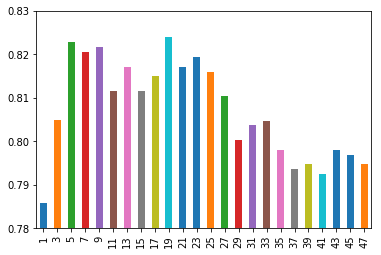

In [23]:
dict_series.plot(kind = "bar",ylim=(0.78,0.83))

## So we can choose neighbors as 19

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]}

In [26]:
knn = KNeighborsClassifier()

In [27]:
grid = GridSearchCV(knn,param_grid=hyperparameters,cv=10)
grid.fit(all_X, all_y)
best_params = grid.best_params_
best_score = grid.best_score_

In [28]:
best_params

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [29]:
best_score

0.8282828282828283

In [31]:
best_knn = grid.best_estimator_

In [32]:
holdout_no_id = holdout.drop(['PassengerId'],axis=1)
holdout_predictions = best_knn.predict(holdout_no_id)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()

In [35]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8428731762065096


In [36]:
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_2.csv",index=False)

In [ ]:
def process_isalone(df):
    df["familysize"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = 0
    df.loc[(df["familysize"] == 0),"isalone"] = 1
    df = df.drop("familysize",axis=1)
    return df

train = process_isalone(train)
holdout = process_isalone(holdout)

## Use it to make a new feature